<a href="https://colab.research.google.com/github/Mac1211/Project/blob/main/mental_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns

In [25]:
# Load the data from CSV
data = pd.read_csv('/content/Student Mental health.csv')

In [26]:
data.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [27]:
data.dtypes

Timestamp                                        object
Choose your gender                               object
Age                                             float64
What is your course?                             object
Your current year of Study                       object
What is your CGPA?                               object
Marital status                                   object
Do you have Depression?                          object
Do you have Anxiety?                             object
Do you have Panic attack?                        object
Did you seek any specialist for a treatment?     object
dtype: object

In [28]:
data = data.dropna(how='any',axis=0)

Text(0.5, 1.0, 'Age distribution')

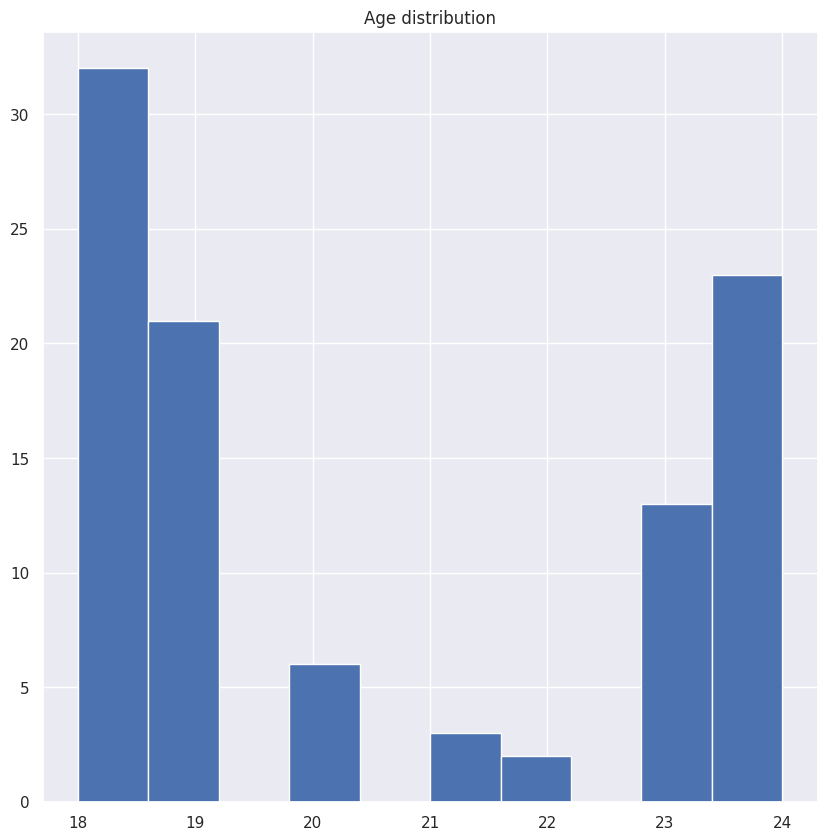

In [29]:
plt.figure(figsize=(10,10))
plt.hist(data['Age'],color='b')
plt.title("Age distribution")

In [31]:
data.rename(columns = {'Choose your gender': 'gender'}, inplace = True)

Text(0.5, 1.0, 'Students studying in particular year')

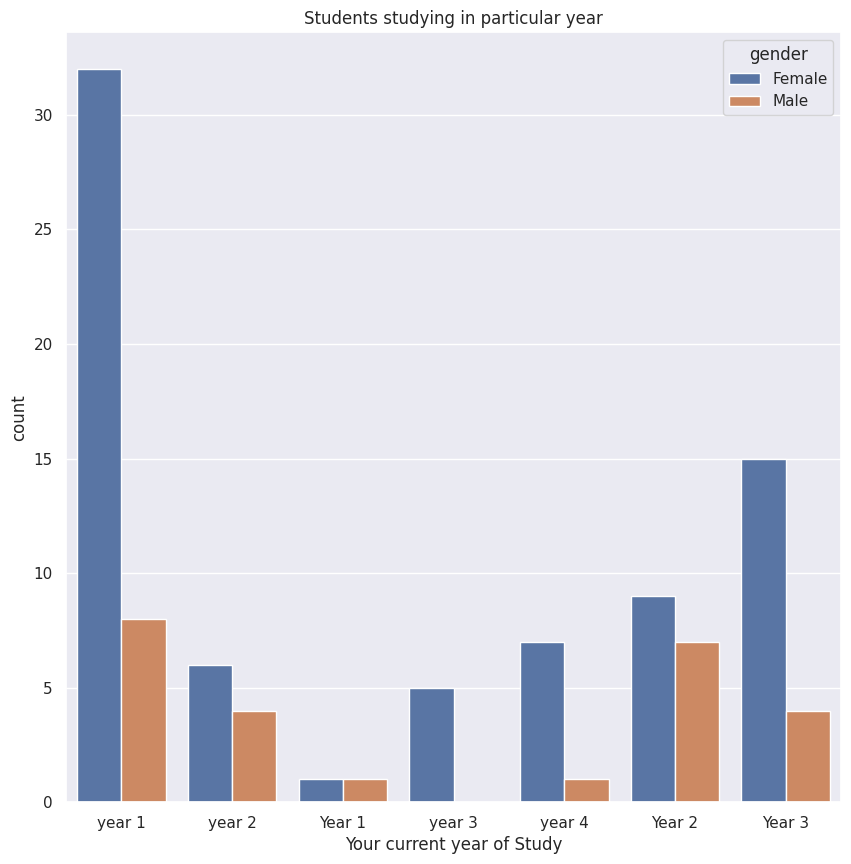

In [33]:
plt.figure(figsize=(10,10))
sns.countplot(data=data, x='Your current year of Study', hue='gender')
plt.title("Students studying in particular year")

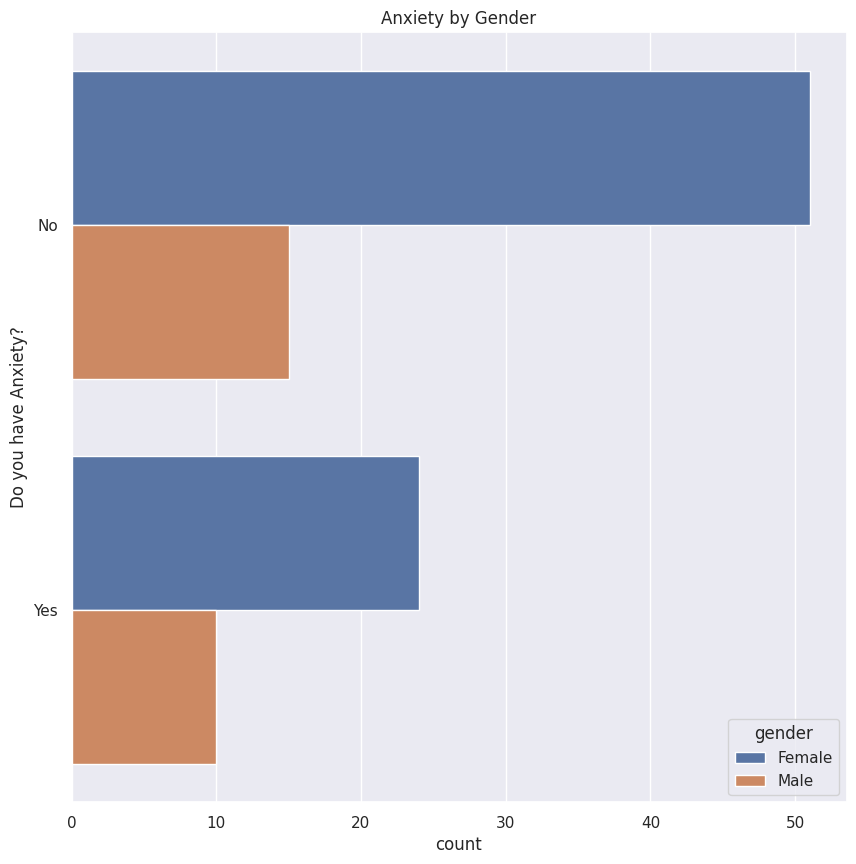

In [34]:
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="Do you have Anxiety?", hue="gender", data=data)
plt.title("Anxiety by Gender")
plt.show()

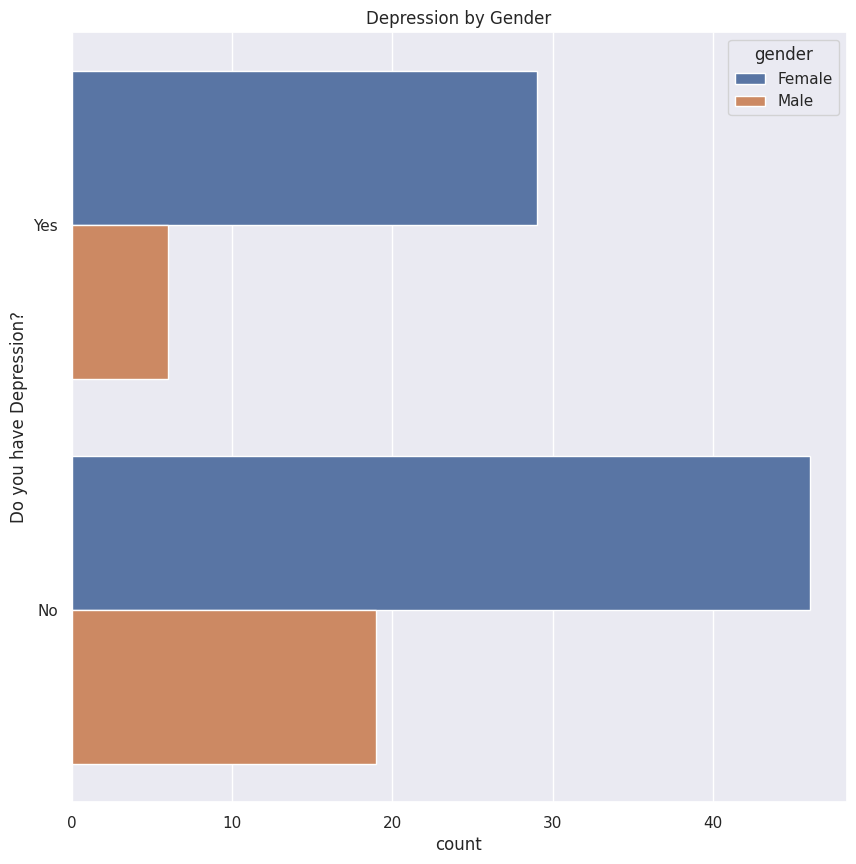

In [35]:
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="Do you have Depression?", hue="gender", data=data)
plt.title("Depression by Gender")
plt.show()

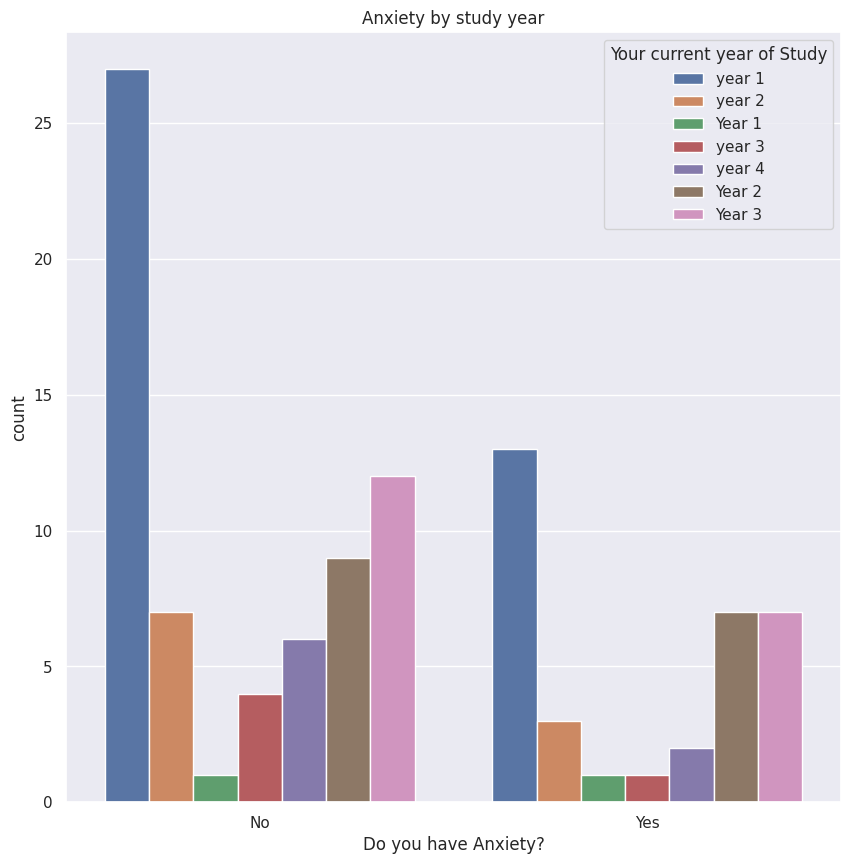

In [36]:
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Do you have Anxiety?", hue="Your current year of Study", data=data)
plt.title("Anxiety by study year")
plt.show()

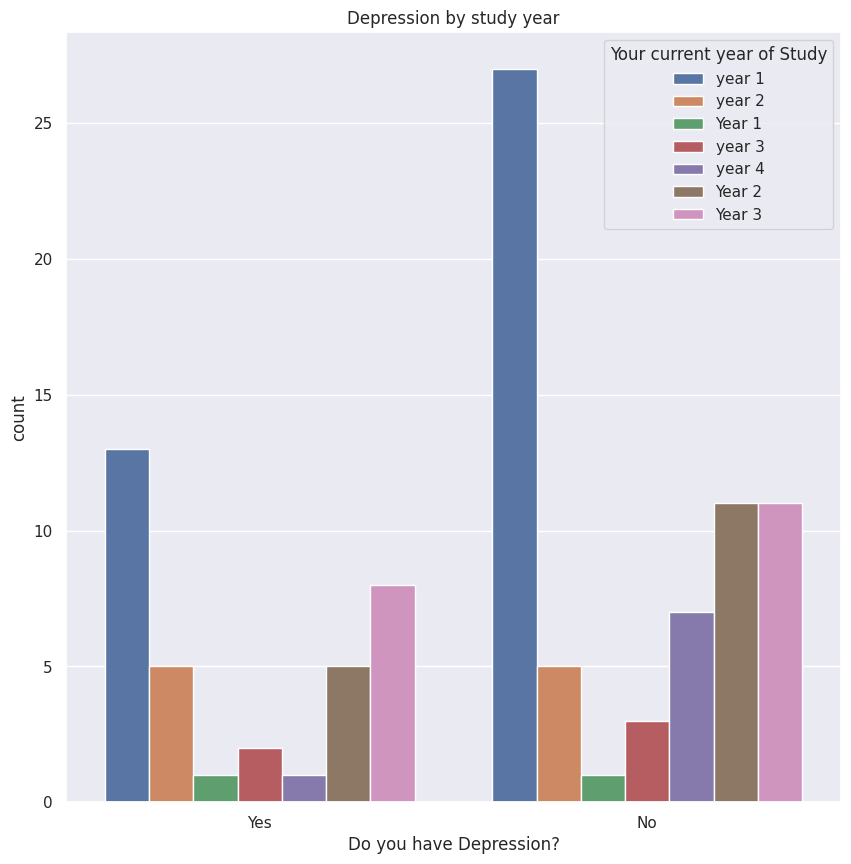

In [37]:
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Do you have Depression?", hue="Your current year of Study", data=data)
plt.title("Depression by study year")
plt.show()

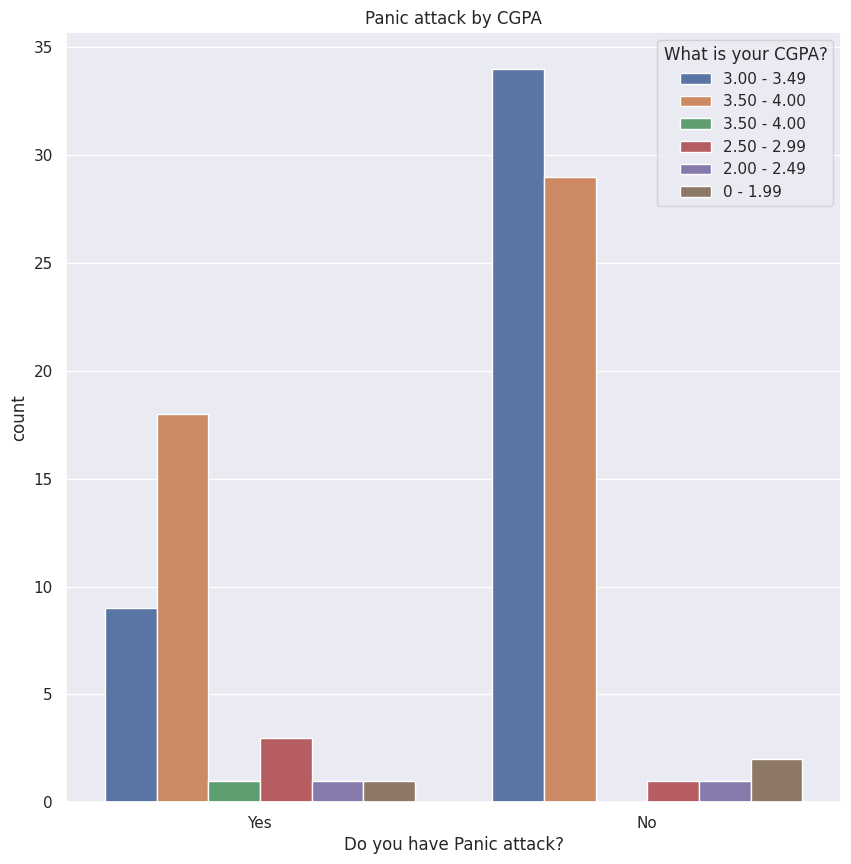

In [39]:
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Do you have Panic attack?", hue="What is your CGPA?", data=data)
plt.title("Panic attack by CGPA")
plt.show()

In [40]:
# Define the features and target variable
data['Gender'] = data['gender'].map({'Male': 0, 'Female': 1})
X = data[['Age', 'Gender']]
y = data['Do you have Depression?'].map({'Yes': 1, 'No': 0}).astype(int)

In [41]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Train the Decision Tree, Logistic Regression and Random forest model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

In [44]:
# Calculate evaluation metrics for Decision Tree Classifier
print("Decision Tree Classifier Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1-Score: {f1_score(y_test, y_pred)}")

Decision Tree Classifier Metrics:
Accuracy: 0.6
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


In [45]:
# Calculate evaluation metrics for Logistic Regression
print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_score(y_test, lr_y_pred)}")
print(f"Precision: {precision_score(y_test, lr_y_pred)}")
print(f"Recall: {recall_score(y_test, lr_y_pred)}")
print(f"F1-Score: {f1_score(y_test, lr_y_pred)}")

Logistic Regression Metrics:
Accuracy: 0.75
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
# Calculate evaluation metrics for Random Forest
print("\nRandom Forest Metrics:")
print(f"Accuracy: {accuracy_score(y_test, rf_y_pred)}")
print(f"Precision: {precision_score(y_test, rf_y_pred)}")
print(f"Recall: {recall_score(y_test, rf_y_pred)}")
print(f"F1-Score: {f1_score(y_test, rf_y_pred)}")


Random Forest Metrics:
Accuracy: 0.5
Precision: 0.14285714285714285
Recall: 0.2
F1-Score: 0.16666666666666666


In [50]:
# Example usage: Predict the likelihood of depression for a 18-year-old male
new_data = pd.DataFrame({'Age': [18], 'Gender': [0]})
depression_likelihood = lr_model.predict_proba(new_data)[:, 1][0]
print(f'Likelihood of depression for a 18-year-old male: {depression_likelihood}')

Likelihood of depression for a 18-year-old male: 0.32310579781924714
